# FRED API Data Exploration and Visulaization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time 
import os

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']


from fredapi import Fred
from dotenv import load_dotenv



In [4]:
#load .env file and pull API key

load_dotenv()

FRED_API_KEY = os.getenv('FRED_API_KEY')

#  Create the  Fred object
This will allow us to pull in the data

In [6]:
fred = Fred(api_key = FRED_API_KEY)

# Search for economic data

In [4]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [5]:
sp_search.shape

(1000, 15)

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-10-27,2022-10-27,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-10-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-10-27 09:07:06-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-10-27,2022-10-27,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:01-05:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-10-27,2022-10-27,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-10-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-10-27 09:07:10-05:00,86,This data represents the effective yield of th...
SP500,SP500,2022-10-27,2022-10-27,S&P 500,2012-10-31,2022-10-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-10-27 19:10:52-05:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-10-27,2022-10-27,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,82,Household data are collected as of March. As ...


# Pull raw data and plot

In [7]:
sp500 = fred.get_series(series_id = 'SP500')

<AxesSubplot:title={'center':'S&P 500'}>

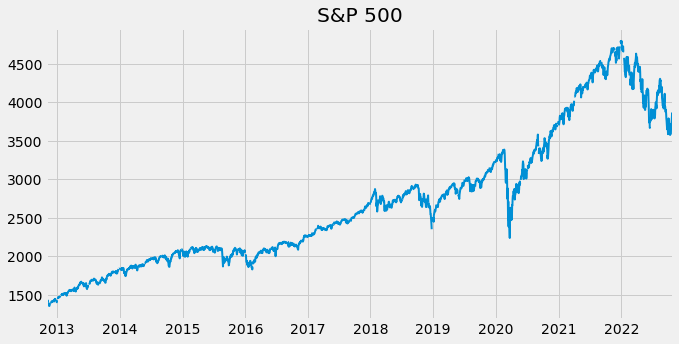

In [8]:
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 2)

# Pull and Join multiple Data Series

In [9]:
unemp_results = fred.search('unemployment')

In [10]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-10-27,2022-10-27,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:01-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-10-27,2022-10-27,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-07 07:43:02-05:00,57,The unemployment rate represents the number of...
NROU,NROU,2022-10-27,2022-10-27,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-10-27,2022-10-27,Unemployment Level,1948-01-01,2022-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2022-10-27,2022-10-27,Continued Claims (Insured Unemployment),1967-01-07,2022-10-15,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-10-27 07:33:04-05:00,70,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AUGU213UR,AUGU213UR,2022-10-27,2022-10-27,"Unemployment Rate in Augusta-Richmond County, ...",1990-01-01,2022-08-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2022-09-28 13:32:20-05:00,2,None
LRUN74TTESQ156S,LRUN74TTESQ156S,2022-10-27,2022-10-27,Unemployment Rate: Aged 15-74: All Persons for...,1999-01-01,2022-01-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2022-09-14 14:41:26-05:00,2,OECD descriptor ID: LRUN74TT OECD unit ID: STS...
LRUN74TTESA156S,LRUN74TTESA156S,2022-10-27,2022-10-27,Unemployment Rate: Aged 15-74: All Persons for...,1999-01-01,2021-01-01,Annual,A,Percent,%,Seasonally Adjusted,SA,2022-04-14 16:07:56-05:00,2,OECD descriptor ID: LRUN74TT OECD unit ID: STS...


In [11]:
unrate = fred.get_series('UNRATE')

In [12]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-05-01    3.6
2022-06-01    3.6
2022-07-01    3.5
2022-08-01    3.7
2022-09-01    3.5
Length: 897, dtype: float64

<AxesSubplot:>

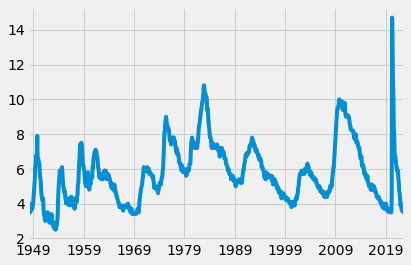

In [13]:
unrate.plot()

In [14]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-10-27,2022-10-27,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:01-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-10-27,2022-10-27,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-07 07:43:02-05:00,57,The unemployment rate represents the number of...
NROU,NROU,2022-10-27,2022-10-27,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-10-27,2022-10-27,Unemployment Level,1948-01-01,2022-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2022-10-27,2022-10-27,Continued Claims (Insured Unemployment),1967-01-07,2022-10-15,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-10-27 07:33:04-05:00,70,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AUGU213UR,AUGU213UR,2022-10-27,2022-10-27,"Unemployment Rate in Augusta-Richmond County, ...",1990-01-01,2022-08-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2022-09-28 13:32:20-05:00,2,None
LRUN74TTESQ156S,LRUN74TTESQ156S,2022-10-27,2022-10-27,Unemployment Rate: Aged 15-74: All Persons for...,1999-01-01,2022-01-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2022-09-14 14:41:26-05:00,2,OECD descriptor ID: LRUN74TT OECD unit ID: STS...
LRUN74TTESA156S,LRUN74TTESA156S,2022-10-27,2022-10-27,Unemployment Rate: Aged 15-74: All Persons for...,1999-01-01,2021-01-01,Annual,A,Percent,%,Seasonally Adjusted,SA,2022-04-14 16:07:56-05:00,2,OECD descriptor ID: LRUN74TT OECD unit ID: STS...


In [15]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [16]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-10-27,2022-10-27,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:01-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-10-27,2022-10-27,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-07 07:43:02-05:00,57,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2022-10-27,2022-10-27,Unemployment Level,1948-01-01,2022-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,69,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2022-10-27,2022-10-27,Unemployment Rate - Black or African American,1972-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:03-05:00,67,The series comes from the 'Current Population ...
U6RATE,U6RATE,2022-10-27,2022-10-27,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:03-05:00,66,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COLL748UR,COLL748UR,2022-10-27,2022-10-27,"Unemployment Rate in College Station-Bryan, TX...",1990-01-01,2022-08-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2022-09-28 13:31:14-05:00,5,None
OHLORA3URN,OHLORA3URN,2022-10-27,2022-10-27,"Unemployment Rate in Lorain County, OH",1990-01-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-28 10:17:07-05:00,5,These data come from the Current Population Su...
MABERK2URN,MABERK2URN,2022-10-27,2022-10-27,"Unemployment Rate in Berkshire County, MA",1990-01-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-28 10:14:11-05:00,5,These data come from the Current Population Su...


In [17]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [18]:
unemp_df = unemp_df.loc[unemp_df.title.str.contains('Unemployment Rate')]

In [19]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-10-27,2022-10-27,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:01-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-10-27,2022-10-27,Unemployment Rate - Black or African American,1972-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:03-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2022-10-27,2022-10-27,Unemployment Rate in California,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-24 09:24:02-05:00,57,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2022-10-27,2022-10-27,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,55,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2022-10-27,2022-10-27,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,22,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000048,LNS14000048,2022-10-27,2022-10-27,Unemployment Rate - 25 Yrs. & over,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:20-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2022-10-27,2022-10-27,Unemployment Rate - 25-34 Yrs.,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:19-05:00,6,The series comes from the 'Current Population ...
LNS14023705,LNS14023705,2022-10-27,2022-10-27,Unemployment Rate - Job Leavers,1967-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:24-05:00,6,The series comes from the 'Current Population ...


# Build unemp_results df

In [21]:
all_results = []

for my_id in unemp_df.index:
    results = fred.get_series(my_id)
    #results.to_frame(name='test')
    all_results.append(results)
    time.sleep(0.1)
unemp_results = pd.concat(all_results, axis =1)

In [22]:
unemp_results.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Had to rename all columns the column titles pulled in as numbers for some reason.

# Create dictionary to rename unemp_results column titles 

In [62]:
id_dict = dict()
current_idx_val = 0
for myid in unemp_df.index:
    id_dict.update({current_idx_val: myid})
    current_idx_val += 1

In [23]:
unemp_results.rename(columns = id_dict, inplace = True)

In [24]:
unemp_results.head()

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,LNS14000031,LNS14000024,TXUR,LNS14000002,NYUR,FLUR,LNS14000009,U2RATE,LNS14000003,LNS14000001,LNS14027662,ALUR,MIUR,PAUR,OHUR,LRUN64TTUSM156S,KYUR,ILUR,LNS14027660,NJUR,LNS14032183,WIUR,COUR,MAUR,NCUR,NDUR,IAUR,TNUR,LASMT261982000000003,AZUR,VAUR,LNS14000012,WAUR,MNUR,SCUR,AKUR,INUR,MOUR,LAUR,UTUR,WVUR,GAUR,ARUR,OKUR,LNS14027659,ORUR,NVUR,HIUR,MDUR,LNS14000028,MSUR,NMUR,KSUR,LNS14000032,LNS14000060,LNS14000018,LNS14024887,NEUR,MEUR,DCUR,LASMT391746000000003,MTUR,SDUR,NHUR,CTUR,CMWRUR,LNS14000029,LRHUTTTTUSM156S,CNERUR,LNS14000036,PRUR,RIUR,WYUR,VTUR,DEUR,IDUR,LNS14027689,LRUN24TTUSM156S,LNS14000150,CSOUUR,CWSTUR,LNS14200000,LNS14000315,LNS14000025,LNS14000026,LNS14024230,LNS14000062,CNEWUR,LRUNTTTTUSM156S,LRUN25TTUSM156S,USAURAMS,LNS14000048,LNS14000089,LNS14023705,CMATUR,LNS14000061
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean up df

Now going to split apart this df. One for state data, the other for demographic data.
Looking through the data frame above we can see all state data is only four letters and also ends in UR. Lets gather those columns into a state data frame and what's leftover for a demographic data frame to analyze that data seperatley. 

In [25]:
col_list_all = list(id_dict.values())

Need to clean up column titles a little as they have some empty space in them.

In [66]:
all_cols_strip = []
for col_title in col_list_all:
    strip_title = col_title.strip()
    all_cols_strip.append(strip_title)
    #print(all_cols_strip)
    #break

In [26]:
#col_list_all
col_list_states = []
col_list_dem = []
#iter = 0
#while iter < 10:
for col in all_cols_strip:
    iter =+ 1
    if len(col) == 4:
        col_list_states.append(col)
    else:
         col_list_dem.append(col) 
#print('col_list_states: {}\ncol_list_dem: {}'.format(col_list_states,col_list_dem))

In [27]:
unemp_results_states = unemp_results[col_list_states]
unemp_results_dem = unemp_results[col_list_dem]

In [28]:
unemp_states = unemp_results_states.dropna()

In [29]:
unemp_states.head()

,CAUR,TXUR,NYUR,FLUR,ALUR,MIUR,PAUR,OHUR,KYUR,ILUR,NJUR,WIUR,COUR,MAUR,NCUR,NDUR,IAUR,TNUR,AZUR,VAUR,WAUR,MNUR,SCUR,AKUR,INUR,MOUR,LAUR,UTUR,WVUR,GAUR,ARUR,OKUR,ORUR,NVUR,HIUR,MDUR,MSUR,NMUR,KSUR,NEUR,MEUR,DCUR,MTUR,SDUR,NHUR,CTUR,PRUR,RIUR,WYUR,VTUR,DEUR,IDUR
1976-01-01,9.2,5.8,10.3,9.7,6.6,9.9,8.0,8.1,5.6,6.6,10.3,5.8,5.8,10.5,6.4,3.4,4.3,6.0,10.2,6.1,8.5,6.0,7.4,7.1,6.6,5.9,6.3,5.8,7.5,8.4,7.3,5.8,9.5,9.2,9.8,6.4,6.7,8.6,4.2,3.3,8.7,8.7,5.8,3.3,6.5,9.8,19.6,7.8,4.1,8.6,8.0,5.6
1976-02-01,9.2,5.8,10.3,9.7,6.6,9.9,8.1,8.1,5.6,6.6,10.3,5.8,5.7,10.5,6.4,3.4,4.3,6.0,10.2,6.1,8.5,6.0,7.4,7.1,6.6,5.9,6.3,5.9,7.5,8.4,7.3,5.8,9.5,9.2,9.8,6.4,6.7,8.7,4.2,3.3,8.7,8.7,5.8,3.3,6.5,9.8,19.5,7.8,4.1,8.6,8.0,5.6
1976-03-01,9.1,5.9,10.2,9.6,6.6,9.9,8.1,8.1,5.6,6.6,10.3,5.7,5.7,10.5,6.4,3.4,4.3,6.0,10.1,6.1,8.4,5.9,7.3,7.0,6.5,5.9,6.3,5.8,7.5,8.4,7.3,5.8,9.4,9.2,9.8,6.4,6.6,8.7,4.2,3.3,8.6,8.6,5.8,3.2,6.5,9.8,19.3,7.7,4.1,8.6,8.0,5.6
1976-04-01,9.1,5.9,10.2,9.5,6.5,9.8,8.1,8.0,5.6,6.6,10.3,5.6,5.6,10.3,6.3,3.5,4.2,6.0,10.0,6.0,8.5,5.8,7.2,6.9,6.3,6.0,6.4,5.8,7.5,8.3,7.2,5.8,9.2,9.0,9.7,6.4,6.4,8.6,4.2,3.2,8.6,8.5,5.8,3.1,6.5,9.6,19.0,7.7,4.0,8.6,8.1,5.6
1976-05-01,9.0,5.9,10.1,9.3,6.4,9.6,8.1,7.8,5.5,6.6,10.3,5.5,5.6,10.1,6.1,3.6,4.1,5.9,9.8,5.9,8.5,5.7,7.0,6.9,6.0,6.0,6.5,5.7,7.4,8.1,7.1,5.7,9.1,8.9,9.4,6.5,6.3,8.6,4.2,3.1,8.5,8.4,5.8,3.1,6.5,9.4,18.9,7.7,3.9,8.5,8.3,5.6


# Clean up state column titles

In [30]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [31]:
unemp_states.head()

,California,Texas,New York,Florida,Alabama,Michigan,Pennsylvania,Ohio,Kentucky,Illinois,New Jersey,Wisconsin,Colorado,Massachusetts,North Carolina,North Dakota,Iowa,Tennessee,Arizona,Virginia,Washington,Minnesota,South Carolina,Alaska,Indiana,Missouri,Louisiana,Utah,West Virginia,Georgia,Arkansas,Oklahoma,Oregon,Nevada,Hawaii,Maryland,Mississippi,New Mexico,Kansas,Nebraska,Maine,the District of Columbia,Montana,South Dakota,New Hampshire,Connecticut,Puerto Rico,Rhode Island,Wyoming,Vermont,Delaware,Idaho
1976-01-01,9.2,5.8,10.3,9.7,6.6,9.9,8.0,8.1,5.6,6.6,10.3,5.8,5.8,10.5,6.4,3.4,4.3,6.0,10.2,6.1,8.5,6.0,7.4,7.1,6.6,5.9,6.3,5.8,7.5,8.4,7.3,5.8,9.5,9.2,9.8,6.4,6.7,8.6,4.2,3.3,8.7,8.7,5.8,3.3,6.5,9.8,19.6,7.8,4.1,8.6,8.0,5.6
1976-02-01,9.2,5.8,10.3,9.7,6.6,9.9,8.1,8.1,5.6,6.6,10.3,5.8,5.7,10.5,6.4,3.4,4.3,6.0,10.2,6.1,8.5,6.0,7.4,7.1,6.6,5.9,6.3,5.9,7.5,8.4,7.3,5.8,9.5,9.2,9.8,6.4,6.7,8.7,4.2,3.3,8.7,8.7,5.8,3.3,6.5,9.8,19.5,7.8,4.1,8.6,8.0,5.6
1976-03-01,9.1,5.9,10.2,9.6,6.6,9.9,8.1,8.1,5.6,6.6,10.3,5.7,5.7,10.5,6.4,3.4,4.3,6.0,10.1,6.1,8.4,5.9,7.3,7.0,6.5,5.9,6.3,5.8,7.5,8.4,7.3,5.8,9.4,9.2,9.8,6.4,6.6,8.7,4.2,3.3,8.6,8.6,5.8,3.2,6.5,9.8,19.3,7.7,4.1,8.6,8.0,5.6
1976-04-01,9.1,5.9,10.2,9.5,6.5,9.8,8.1,8.0,5.6,6.6,10.3,5.6,5.6,10.3,6.3,3.5,4.2,6.0,10.0,6.0,8.5,5.8,7.2,6.9,6.3,6.0,6.4,5.8,7.5,8.3,7.2,5.8,9.2,9.0,9.7,6.4,6.4,8.6,4.2,3.2,8.6,8.5,5.8,3.1,6.5,9.6,19.0,7.7,4.0,8.6,8.1,5.6
1976-05-01,9.0,5.9,10.1,9.3,6.4,9.6,8.1,7.8,5.5,6.6,10.3,5.5,5.6,10.1,6.1,3.6,4.1,5.9,9.8,5.9,8.5,5.7,7.0,6.9,6.0,6.0,6.5,5.7,7.4,8.1,7.1,5.7,9.1,8.9,9.4,6.5,6.3,8.6,4.2,3.1,8.5,8.4,5.8,3.1,6.5,9.4,18.9,7.7,3.9,8.5,8.3,5.6


# Graph state data

In [73]:
px.line(unemp_states, title = 'Unemployment Percentage Rate by State')

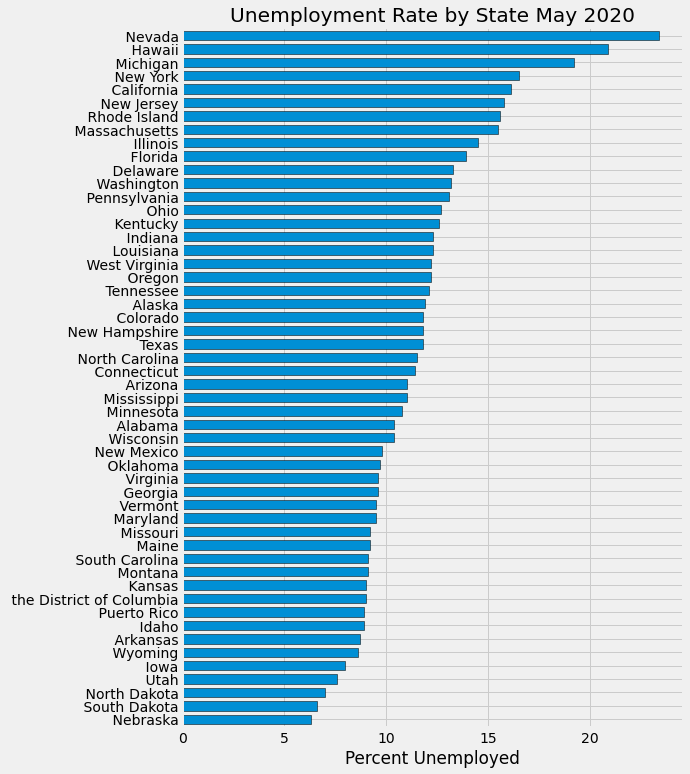

In [33]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind = 'barh', figsize = (8,12), width = 0.7, edgecolor = 'black', 
      title = 'Unemployment Rate by State May 2020')

ax.legend().remove()
ax.set_xlabel('Percent Unemployed')
plt.show()

# Pull in participation data

In [46]:
part_df = fred.search('participation rate state', filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [47]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
    time.sleep(0.1)
    
part_states = pd.concat(all_results, axis = 1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [48]:
#unemp_states = unemp_states.rename(columns = {'the District of Columbia': 'District of Columbia'})

# Plot participation and unemployment % rate

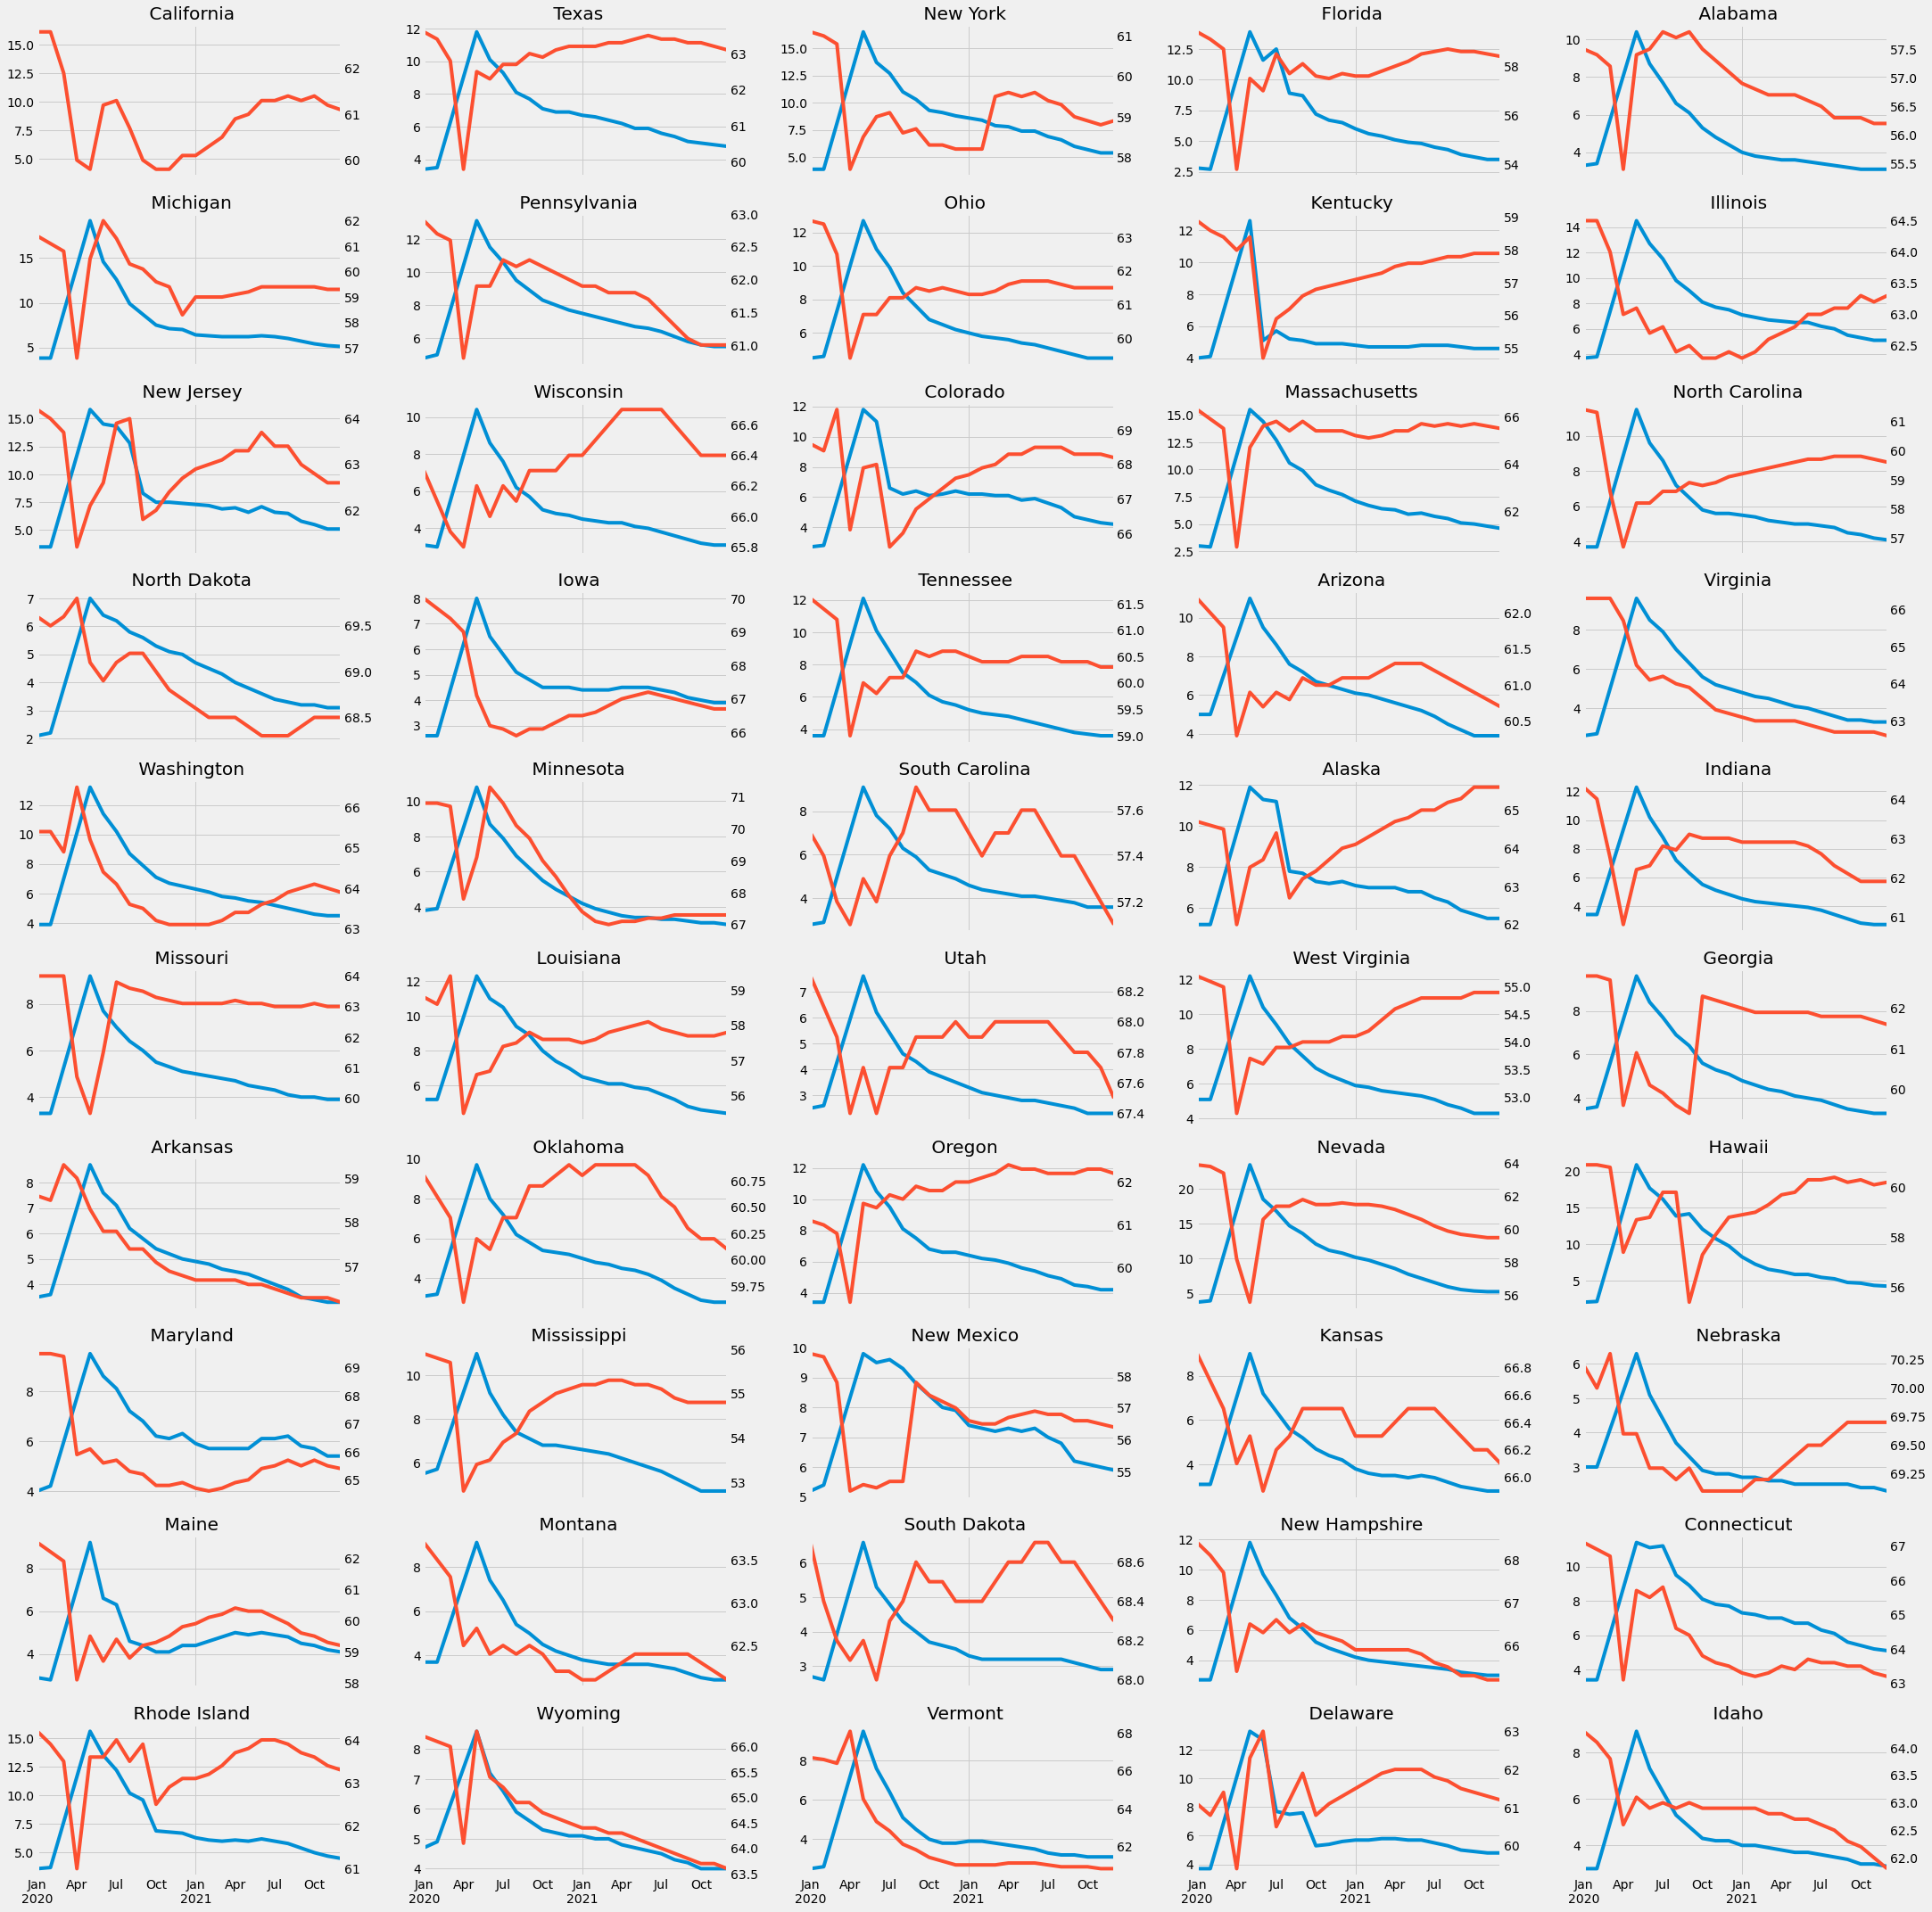

In [55]:
fig, axs = plt.subplots(10,5, figsize = (30,30), sharex = True)

axs = axs.flatten()

i=0
for state in unemp_states.columns:
    if state in ['District of Columbia','the District of Columbia', 'Puerto Rico']:
        continue 
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label = 'Unemployment')
    
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax= ax2, label = 'Participation', color = color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
    
plt.tight_layout()
plt.show()
    

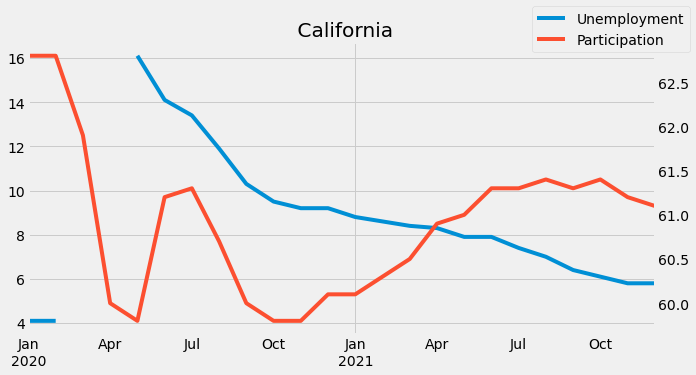

In [61]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_states2 = unemp_states.asfreq('MS')
q1 = unemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
q2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

